In [13]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
results = pd.read_csv('results/regression/tune_svr_poly_fp.csv')
results.shape

(3840, 12)

In [15]:

import re

def rename_columns(df):
    def rename_col(n):
        new_n = re.sub(r" \[.*\]$", "", n)
        if new_n == 'NAME':
            return 'name'
        elif new_n == 'METHOD':
            return 'method'
        elif new_n.startswith("rmse_"):
            return re.sub(r"^rmse_", "f", new_n)
        elif new_n.startswith("auc_"):
            return re.sub(r"auc_", "f", new_n)
        else:
            return new_n
    columns_map = {n:rename_col(n) for n in df.columns}
    df.rename(columns=columns_map, inplace=True)


In [16]:
rename_columns(results)
results.columns

Index(['name', 'method', 'degree', 'C', 'foldSize', 'featuresColumn',
       'scalerType', 'coef0', 'rmse', 'f1', 'f2', 'f3'],
      dtype='object')

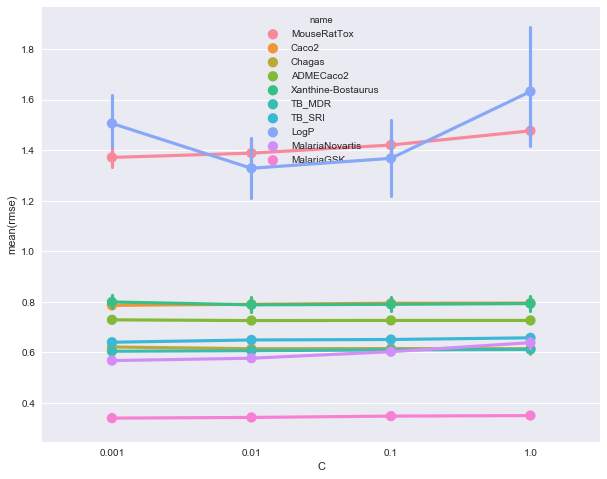

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
sns.pointplot(x='C', y='rmse', hue='name', data=results, ax=axes)